In [5]:
# instalo openpyxl para leer el Excel, matplotlib y seaborn (para los gráficos y análisis estadísticos) e importo las librerías de panda y numpys, 
# además de load_workbook desde openpyxl para que reconozca las 43.000 filas

!python -m pip install openpyxl matplotlib seaborn
from openpyxl import load_workbook
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# abro con openpyxl para asegurar que detectamos todas las filas

wb = load_workbook("Trabajo_excel_python.xlsx")
ws = wb.active
print(f"Filas totales detectadas por openpyxl: {ws.max_row}, Columnas: {ws.max_column}")


NameError: name 'load_workbook' is not defined

In [1]:
# cargo a pandas asegurándome de tomar todas las filas

df = pd.read_excel("Trabajo_excel_python.xlsx", engine="openpyxl", header=0)

# Creo generador de todas las filas
data = ws.values

# Tomo la primera fila como nombres de columnas
cols = next(data)

# Creo DataFrame con el resto de las filas
df = pd.DataFrame(data, columns=cols)

# reviso que cargan todas las filas

print(f"Dataset cargado en pandas: {df.shape[0]} filas x {df.shape[1]} columnas")

NameError: name 'pd' is not defined

In [84]:
print("\n--- Información general ---")
print(df.info())

summary = pd.DataFrame({
    "dtype": df.dtypes,
    "n_nulls": df.isna().sum(),
    "n_unique": df.nunique()
})
print("\n--- Resumen de columnas ---")
print(summary)


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 43000 non-null  int64         
 1   Start date                           42752 non-null  datetime64[ns]
 2   Age                                  37880 non-null  float64       
 3   Job                                  43000 non-null  object        
 4   Education                            43000 non-null  object        
 5   Marital                              43000 non-null  object        
 6   Income                               43000 non-null  int64         
 7   Kidhome                              43000 non-null  int64         
 8   Teenhome                             43000 non-null  int64         
 9   Payment default                      34019 non-null  f

In [85]:
# separo columnas numéricas y categóricas

numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

print(f"\nColumnas numéricas ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"Columnas categóricas ({len(categorical_cols)}): {list(categorical_cols)}")


Columnas numéricas (20): ['Year', 'Age', 'Income', 'Kidhome', 'Teenhome', 'Payment default', 'NumWebVisitsMonth', 'Current campaign calls', 'Duration', 'Days from last call', 'Previous contacts', 'Employment var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3months', 'Nr.employed', 'Latitude', 'Longitude', 'Latitude OK', 'Longitude OK']
Columnas categóricas (13): ['Job', 'Education', 'Marital', 'Housing', 'Loan', 'Service/product contracted', 'Previous marketing campaign outcome', 'ID', None, None, None, None, None]


In [86]:
# elimino las columnas sin nombre, con nombre NaN o con espacios, las inválidas y las que dan problemas:

df = df.loc[:, df.columns.notna()]
df = df.loc[:, df.columns.astype(str).str.strip() != ""]
bad_cols = [col for col in df.columns if col is None or str(col).strip() == ""]
categorical_cols = [
    col for col in categorical_cols
    if col is not None and col in df.columns
]


In [87]:
#estadísticas de las columnas numéricas

print("\n--- Estadísticas numéricas ---")
numeric_stats = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
numeric_stats["median"] = df[numeric_cols].median()
print(numeric_stats)


--- Estadísticas numéricas ---
                          count          mean           std         min  \
Year                    43000.0   2012.861535      0.879460    2012.000   
Age                     37880.0     39.977112     10.437957      17.000   
Income                  43000.0  93241.200070  50498.316182    5841.000   
Kidhome                 43000.0      1.004791      0.815913       0.000   
Teenhome                43000.0      0.998605      0.815983       0.000   
Payment default         34019.0      0.000882      0.093905       0.000   
NumWebVisitsMonth       43000.0     16.589698      9.239205       1.000   
Current campaign calls  43000.0      2.567233      2.772294       1.000   
Duration                43000.0    257.739279    258.666033       0.000   
Days from last call     43000.0    962.330953    187.260394       0.000   
Previous contacts       43000.0      0.174023      0.497366       0.000   
Employment var.rate     43000.0      0.771279     15.738984     -34.

In [119]:
# vuelvo a definir las columnas categóricas

categorical_cols = df.select_dtypes(include=["object", "category"]).columns


In [120]:
# estadísticas de las columnas categóricas

print("\n--- Estadísticas categóricas ---")
for col in categorical_cols:
    print(f"\nColumna: {col}")
    counts = df[col].value_counts(dropna=False)
    percents = df[col].value_counts(normalize=True, dropna=False) * 100
    cat_summary = pd.DataFrame({"count": counts, "percent": percents})
    print(cat_summary)


--- Estadísticas categóricas ---

Columna: Job
               count    percent
Job                            
admin.         10873  25.286047
blue-collar     9654  22.451163
technician      7026  16.339535
services        4162   9.679070
management      3050   7.093023
retired         1790   4.162791
entrepreneur    1522   3.539535
self-employed   1489   3.462791
housemaid       1123   2.611628
unemployed      1063   2.472093
student          903   2.100000
                 345   0.802326

Columna: Education
                     count    percent
Education                            
university.degree    12722  29.586047
high.school           9925  23.081395
basic.9y              6309  14.672093
professional.course   5477  12.737209
basic.4y              4356  10.130233
basic.6y              2386   5.548837
                      1807   4.202326
illiterate              18   0.041860

Columna: Marital
          count    percent
Marital                   
MARRIED   25999  60.462791
SINGL

In [91]:
# detecto columnas binarias

binary_cols = []

for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 2:
        binary_cols.append(col)

print("Columnas binarias detectadas:")
print(binary_cols)

Columnas binarias detectadas:
['Payment default', 'Housing', 'Loan', 'Service/product contracted']


In [92]:
# defino la función de transformación y la aplico

def binary_transform(series):
    s = series.copy()

    # Si ya es numérica y es 0/1
    if pd.api.types.is_numeric_dtype(s):
        uniq = sorted(s.dropna().unique())
        if uniq == [0, 1]:
            return s

    # Normalizar texto
    s = s.astype(str).str.strip().str.lower()

    mapping = {
        "yes": 1, "no": 0,
        "y": 1, "n": 0,
        "true": 1, "false": 0,
        "1": 1, "0": 0,
        "sí": 1, "si": 1
    }

    mapped = s.map(mapping)

    # Aceptar solo si es fiable (>90%)
    if mapped.notna().sum() >= s.notna().sum() * 0.9:
        return mapped

    return series

for col in binary_cols:
    df[col] = binary_transform(df[col])

In [93]:
# me quedo solo con las binarias seguras (>90% de conversión)
safe_binary_cols = [
    col for col in binary_cols
    if set(df[col].dropna().unique()).issubset({0, 1})
]

print("Columnas binarias listas para ML:")
print(safe_binary_cols)

Columnas binarias listas para ML:
['Housing', 'Loan', 'Service/product contracted']


In [94]:
# primero, vamos a revisar los datos generales para hacernos una idea de lo que tenemos y detectar posibles problemas de carga o formato que puedan afectar al análisis posterior

print("Dimensiones del dataset:", df.shape)

# 1️ Calidad general del dataset
print("\n Valores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

print("\n Tipos de datos:")
print(df.dtypes)

# 2 Estadísticas descriptivas numéricas
numeric_cols = df.select_dtypes(include='number')

print("\n Estadísticas numéricas:")
print(numeric_cols.describe().T)

# 3 Detección de outliers (IQR)
outliers = {}

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((numeric_cols[col] < Q1 - 1.5*IQR) | 
                     (numeric_cols[col] > Q3 + 1.5*IQR)).sum()
    outliers[col] = outlier_count

outlier_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers'])
print("\n Número de outliers por variable:")
print(outlier_df.sort_values('Outliers', ascending=False))

# 4 Distribución de variables categóricas
categorical_cols = df.select_dtypes(include='object')

print("\n Variables categóricas — top valores:")
for col in categorical_cols.columns:
    print(f"\n {col}")
    print(df[col].value_counts().head(10))

# 5 Correlaciones entre variables numéricas
correlations = numeric_cols.corr()

print("\n Correlaciones más fuertes:")
corr_pairs = (
    correlations.unstack()
    .reset_index()
    .rename(columns={0: "correlation"})
)

corr_pairs = corr_pairs[corr_pairs['level_0'] != corr_pairs['level_1']]
corr_pairs['abs_corr'] = corr_pairs['correlation'].abs()

print(corr_pairs.sort_values('abs_corr', ascending=False).head(15))

# 6️ Análisis de la variable objetivo (si existe conversión)
if 'Service/product contracted' in df.columns:
    conversion_rate = df['Service/product contracted'].mean()
    print("\n Tasa de conversión global:", round(conversion_rate, 3))

    print("\n Conversión por variable clave:")
    for col in ['Age', 'Income', 'NumWebVisitsMonth', 'Duration']:
        if col in df.columns:
            print(f"\n {col}")
            print(df.groupby(pd.qcut(df[col], 5, duplicates='drop'))['Service/product contracted'].mean())

Dimensiones del dataset: (43000, 30)

 Valores nulos por columna:
Euribor3months                         9256
Payment default                        8981
Age                                    5120
Housing                                1026
Loan                                   1026
Cons.price.idx                          471
Start date                              248
Education                                 0
Marital                                   0
Income                                    0
Teenhome                                  0
Kidhome                                   0
Job                                       0
Year                                      0
Service/product contracted                0
NumWebVisitsMonth                         0
Days from last call                       0
Current campaign calls                    0
Previous contacts                         0
Interaction date                          0
Previous marketing campaign outcome       0
Duration  

C:\Users\athga\AppData\Local\Temp\ipykernel_5848\2124642017.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(pd.qcut(df[col], 5, duplicates='drop'))['Service/product contracted'].mean())
C:\Users\athga\AppData\Local\Temp\ipykernel_5848\2124642017.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(pd.qcut(df[col], 5, duplicates='drop'))['Service/product contracted'].mean())
C:\Users\athga\AppData\Local\Temp\ipykernel_5848\2124642017.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

In [95]:
# voy a analizar cuál es mi target basándome en los clientes que han contratado un producto o servicio en esta campaña

target = "Service/product contracted"

In [96]:
# si me centro en el trabajo, ¿qué segmentos han tenido mejor conversión?

segment_job = (
    df.groupby("Job")[target]
    .agg(
        total_clients="count",
        conversions="sum",
        conversion_rate="mean"
    )
    .sort_values("conversion_rate", ascending=False)
)

segment_job["conversion_rate"] *= 100
print(segment_job)

               total_clients  conversions  conversion_rate
Job                                                       
student                  903          283        31.339978
retired                 1790          451        25.195531
unemployed              1063          153        14.393227
admin.                 10873         1415        13.013888
                         345           39        11.304348
management              3050          342        11.213115
technician              7026          762        10.845431
self-employed           1489          161        10.812626
housemaid               1123          111         9.884239
entrepreneur            1522          126         8.278581
services                4162          336         8.073042
blue-collar             9654          665         6.888336


In [97]:
# ¿y si me centro en la educación?

segment_education = (
    df.groupby("Education")[target]
    .agg(
        total_clients="count",
        conversions="sum",
        conversion_rate="mean"
    )
    .sort_values("conversion_rate", ascending=False)
)

segment_education["conversion_rate"] *= 100
print(segment_education)

                     total_clients  conversions  conversion_rate
Education                                                       
illiterate                      18            4        22.222222
                              1807          261        14.443830
university.degree            12722         1748        13.739978
professional.course           5477          620        11.320066
high.school                   9925         1076        10.841310
basic.4y                      4356          448        10.284665
basic.6y                      2386          194         8.130763
basic.9y                      6309          493         7.814234


In [98]:
# ¿y por estado civil?

segment_marital = (
    df.groupby("Marital")[target]
    .agg(
        total_clients="count",
        conversions="sum",
        conversion_rate="mean"
    )
    .sort_values("conversion_rate", ascending=False)
)

segment_marital["conversion_rate"] *= 100
print(segment_marital)

          total_clients  conversions  conversion_rate
Marital                                              
                     85           13        15.294118
SINGLE            12105         1686        13.928129
MARRIED           25999         2655        10.211931
DIVORCED           4811          490        10.184993


In [99]:
# también quiero ver qué rango de edad ha tenido mejor conversión, así que primero creo los rangos de edad en bloques significativos y luego lo reviso

age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ["<25", "25–34", "35–44", "45–54", "55–64", "65+"]

df["Age_range"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)



In [100]:
# conversión por rango de edad
conversion_by_age = (
    df.groupby("Age_range")
      .agg(
          Clientes=("Service/product contracted", "count"),
          Conversiones=("Service/product contracted", "sum"),
          Tasa_conversion=("Service/product contracted", "mean")
      )
      .sort_values("Tasa_conversion", ascending=False)
)

print(conversion_by_age)
conversion_by_age


           Clientes  Conversiones  Tasa_conversion
Age_range                                         
65+             576           265         0.460069
<25            1560           326         0.208974
55–64          2694           415         0.154046
25–34         13705          1591         0.116089
45–54          7542           655         0.086847
35–44         11803          1014         0.085910


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3621398368.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_range")


,Clientes,Conversiones,Tasa_conversion
Age_range,,,
65+,576,265,0.460069
<25,1560,326,0.208974
55–64,2694,415,0.154046
25–34,13705,1591,0.116089
45–54,7542,655,0.086847
35–44,11803,1014,0.085910


In [101]:
# conversión por ingresos

bins = [0, 20000, 40000, 60000, 80000, 100000, df['Income'].max()]
labels = ['<20k', '20–40k', '40–60k', '60–80k', '80–100k', '>100k']

df['Income_range_real'] = pd.cut(df['Income'], bins=bins, labels=labels)

conversion_by_income_real = (
    df.groupby('Income_range_real')['Service/product contracted']
      .agg(['count', 'mean'])
      .rename(columns={'count': 'Clientes', 'mean': 'Tasa de conversión'})
)

print(conversion_by_income_real)

                   Clientes  Tasa de conversión
Income_range_real                              
<20k                   3491            0.108278
20–40k                 4970            0.117304
40–60k                 4911            0.111993
60–80k                 4878            0.117671
80–100k                4951            0.114926
>100k                 19799            0.110612


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\961176095.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_range_real')['Service/product contracted']


In [102]:
# vamos a comprobar cuál es el target cruzando nivel educativo, empleo y franja de edad, pero siempre que haya al menos 100 clientes en el segmento. 
# Mostraremos los primeros 10 segmentos

segment_cols = ['Education', 'Job', 'Age_range']
target_col = 'Service/product contracted'

# Calcular todos los segmentos
segmentos = (df
             .groupby(segment_cols)[target_col]
             .agg(total_clients='count', conversions='sum')
            )

segmentos['conversion_rate'] = 100 * segmentos['conversions'] / segmentos['total_clients']
segmentos = segmentos.reset_index()

# FILTRAR: mínimo 100 personas por segmento
segmentos_significativos = segmentos[segmentos['total_clients'] >= 100]

# Ordenar por mejor conversión (y desempate por volumen)
segmentos_top = (segmentos_significativos
                 .sort_values(['conversion_rate', 'total_clients'], ascending=[False, False])
                )

# MOSTRAR TOP 10 MEJORES SEGMENTOS
print("=== TOP 10 SEGMENTOS TARGET (mín. 100 personas) ===\n")
top10 = segmentos_top.head(10)
print(top10[['Education', 'Job', 'Age_range', 'total_clients', 
             'conversions', 'conversion_rate']].round(2))

print(f"\nTotal segmentos analizados: {len(segmentos_significativos)}")
print(f"Mejor conversión: {segmentos_top['conversion_rate'].max():.2f}%")

=== TOP 10 SEGMENTOS TARGET (mín. 100 personas) ===

               Education      Job Age_range  total_clients  conversions  \
113             basic.4y  retired       65+            240          122   
342          high.school  student       <25            213           71   
510    university.degree   admin.       <25            111           33   
343          high.school  student     25–34            113           30   
298          high.school   admin.     55–64            106           24   
559    university.degree  student     25–34            113           24   
328          high.school  retired     55–64            126           26   
544    university.degree  retired     55–64            152           30   
472  professional.course  retired     55–64            119           23   
514    university.degree   admin.     55–64            215           41   

     conversion_rate  
113            50.83  
342            33.33  
510            29.73  
343            26.55  
298   

C:\Users\athga\AppData\Local\Temp\ipykernel_5848\2410114975.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(segment_cols)[target_col]


In [103]:
# vamos a comprobar cuál es el target cruzando estado civil y que haya o no niños y/o adolescentes en casa, pero siempre que haya al menos 500 clientes en el segmento. 
# Mostraremos los primeros 10 segmentos

segment_cols = ['Marital', 'Kidhome','Teenhome']
target_col = 'Service/product contracted'

# Calcular todos los segmentos
segmentos = (df
             .groupby(segment_cols)[target_col]
             .agg(total_clients='count', conversions='sum')
            )

segmentos['conversion_rate'] = 100 * segmentos['conversions'] / segmentos['total_clients']
segmentos = segmentos.reset_index()

# FILTRAR: mínimo 500 personas por segmento
segmentos_significativos = segmentos[segmentos['total_clients'] >= 500]

# Ordenar por mejor conversión (y desempate por volumen)
segmentos_top = (segmentos_significativos
                 .sort_values(['conversion_rate', 'total_clients'], ascending=[False, False])
                )

# MOSTRAR TOP 10 MEJORES SEGMENTOS
print("=== TOP 10 SEGMENTOS TARGET (mín. 500 personas) ===\n")
top10 = segmentos_top.head(10)
print(top10[['Marital', 'Kidhome', 'Teenhome', 'total_clients', 
             'conversions', 'conversion_rate']].round(2))

print(f"\nTotal segmentos analizados: {len(segmentos_significativos)}")
print(f"Mejor conversión: {segmentos_top['conversion_rate'].max():.2f}%")

=== TOP 10 SEGMENTOS TARGET (mín. 500 personas) ===

     Marital  Kidhome  Teenhome  total_clients  conversions  conversion_rate
32    SINGLE        1         2           1328          196            14.76
34    SINGLE        2         1           1398          200            14.31
29    SINGLE        0         2           1358          193            14.21
31    SINGLE        1         1           1331          187            14.05
27    SINGLE        0         0           1363          191            14.01
35    SINGLE        2         2           1358          190            13.99
33    SINGLE        2         0           1340          183            13.66
30    SINGLE        1         0           1308          177            13.53
28    SINGLE        0         1           1321          169            12.79
11  DIVORCED        0         2            526           65            12.36

Total segmentos analizados: 27
Mejor conversión: 14.76%


In [104]:
# así que este sería el mejor segmento objetivo:

segmentos_top.iloc[0]

Marital               SINGLE
Kidhome                    1
Teenhome                   2
total_clients           1328
conversions              196
conversion_rate    14.759036
Name: 32, dtype: object

In [105]:
# si quisiera identificarlos para poder contactar directamente con ellos para una campaña de marketing:

target_principal = df[
    (df['Education'] == 'basic.4y') &
    (df['Marital'] == 'MARRIED') &
    (df['Job'] == 'retired') &
    (df['Age_range'] == '65+')
]

print(f"✅ TARGET PRINCIPAL: {len(target_principal)} clientes")
print(f"📊 Tasa conversión: {target_principal['Service/product contracted'].mean()*100:.1f}%")

# Ver TODOS los clientes (scroll en notebook)
target_principal

# O si prefieres columnas específicas:
cols_interes = ['Year', 'Age', 'Education', 'Marital', 'Job', 'Age_range', 
                'Income', 'Service/product contracted', 'Duration']
print(target_principal[cols_interes])

✅ TARGET PRINCIPAL: 149 clientes
📊 Tasa conversión: 52.3%
       Year   Age Education  Marital      Job Age_range  Income  \
27679  2013  66.0  basic.4y  MARRIED  retired       65+   47367   
27693  2013  70.0  basic.4y  MARRIED  retired       65+   10875   
27694  2013  70.0  basic.4y  MARRIED  retired       65+  128245   
27700  2013  70.0  basic.4y  MARRIED  retired       65+  133954   
27767  2013  68.0  basic.4y  MARRIED  retired       65+  122816   
...     ...   ...       ...      ...      ...       ...     ...   
41382  2014  78.0  basic.4y  MARRIED  retired       65+   41823   
42494  2014  77.0  basic.4y  MARRIED  retired       65+  142173   
42528  2014  73.0  basic.4y  MARRIED  retired       65+  172160   
42611  2014  70.0  basic.4y  MARRIED  retired       65+   62174   
42966  2014  73.0  basic.4y  MARRIED  retired       65+   43187   

       Service/product contracted  Duration  
27679                           1       156  
27693                           0        61  

In [106]:
# identifico los segmentos con menos del 5% de conversión, para no gastar recursos en campañas poco efectivas:

MIN_CLIENTS = 100
MAX_CONVERSION = 0.05  # 5%

# AGRUPACIÓN DE SEGMENTOS

bad_segments = (
    df.groupby(["Education", "Marital", "Job", "Age_range"])
      .agg(
          total_clients=("Service/product contracted", "count"),
          conversions=("Service/product contracted", "sum"),
          conversion_rate=("Service/product contracted", "mean")
      )
      .query(
          "conversion_rate < @MAX_CONVERSION and total_clients >= @MIN_CLIENTS"
      )
      .sort_values(
          ["conversion_rate", "total_clients"],
          ascending=[True, False]
      )
)

# RESULTADOS

print("=== SEGMENTOS EN LOS QUE NO INVERTIR ===")
print(f"Umbral conversión: < {MAX_CONVERSION*100:.1f}%")
print(f"Mínimo clientes por segmento: {MIN_CLIENTS}\n")

print(bad_segments)

print("\n--- RESUMEN ---")
print(f"Nº de segmentos descartados: {len(bad_segments)}")
print(f"Clientes totales afectados: {bad_segments['total_clients'].sum()}")
print(f"Conversión media global (descartados): {bad_segments['conversion_rate'].mean()*100:.2f}%")

=== SEGMENTOS EN LOS QUE NO INVERTIR ===
Umbral conversión: < 5.0%
Mínimo clientes por segmento: 100

                                                    total_clients  \
Education         Marital  Job           Age_range                  
basic.4y          MARRIED  housemaid     35–44                104   
high.school       DIVORCED admin.        25–34                101   
basic.9y          MARRIED  blue-collar   55–64                103   
university.degree MARRIED  self-employed 45–54                102   
                  MARRIED  blue-collar   35–44                124   
basic.4y          MARRIED  blue-collar   35–44                624   
                  SINGLE   blue-collar   25–34                112   
                  MARRIED  blue-collar   25–34                291   

                                                    conversions  \
Education         Marital  Job           Age_range                
basic.4y          MARRIED  housemaid     35–44                2   
high.s

C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3989141898.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Education", "Marital", "Job", "Age_range"])


In [107]:
# ahora vamos a centrarnos en variables económicas

# estudio el hecho de que el cliente haya contratado en el pasado algún producto o servicio bancario y tenga o no un préstamo, hipoteca y/o problemas de pagos

economic_vars = ['Housing', 'Loan', 'Payment default', ]

conversion_rates = (
    df.groupby(economic_vars)['Service/product contracted']
      .mean()
      .reset_index()
)

print(conversion_rates)

   Housing  Loan  Payment default  Service/product contracted
0      0.0   0.0              0.0                    0.123669
1      0.0   0.0             10.0                    0.000000
2      0.0   1.0              0.0                    0.125355
3      1.0   0.0              0.0                    0.134261
4      1.0   0.0             10.0                    0.000000
5      1.0   1.0              0.0                    0.125364


In [108]:
# Cómo influye "ya tener productos" en otras variables importantes

predictoras = ['Loan', 'Housing', 'Payment default']
target_col = 'Service/product contracted'

# groupby simple
grupos = df.groupby(predictoras)[target_col].agg(['count', 'sum'])
grupos.columns = ['total_clientes', 'con_productos']
grupos = grupos.reset_index()

# calcular porcentaje
grupos['pct_con_productos'] = (100 * grupos['con_productos'] / grupos['total_clientes']).round(2)

# filtrar y ordenar
grupos_sig = grupos[grupos['total_clientes'] >= 100]
top_leales = grupos_sig.sort_values('pct_con_productos', ascending=False).head(10)

print("=== TOP 10 perfiles con MAYOR % clientes que YA tienen productos ===\n")
print(top_leales[['Loan', 'Housing', 'Payment default', 'total_clientes', 'pct_con_productos']])

=== TOP 10 perfiles con MAYOR % clientes que YA tienen productos ===

   Loan  Housing  Payment default  total_clientes  pct_con_productos
2   0.0      1.0              0.0           14874              13.43
4   1.0      0.0              0.0            2114              12.54
5   1.0      1.0              0.0            3087              12.54
0   0.0      0.0              0.0           13148              12.37


In [109]:
# analizo las llamadas que ha recibido el cliente en la campaña actual por rangos y su conversión

# Crear rangos de número de llamadas
df['Calls_bin'] = pd.cut(
    df['Current campaign calls'],
    bins=[-1, 0, 1, 2, 3, 5, 8, 15, 100],
    labels=[
        '0 llamadas',
        '1 llamada',
        '2 llamadas',
        '3 llamadas',
        '4–5 llamadas',
        '6–8 llamadas',
        '9–15 llamadas',
        '16+ llamadas'
    ]
)

# Calcular conversión por rango
conversion_by_calls = (
    df.groupby('Calls_bin')['Service/product contracted']
      .agg(
          Clientes='count',
          Tasa_conversion='mean'
      )
      .reset_index()
)

print(conversion_by_calls)

       Calls_bin  Clientes  Tasa_conversion
0     0 llamadas         0              NaN
1      1 llamada     18404         0.130189
2     2 llamadas     11048         0.114772
3     3 llamadas      5584         0.108166
4   4–5 llamadas      4435         0.085908
5   6–8 llamadas      2101         0.066159
6  9–15 llamadas      1056         0.048295
7   16+ llamadas       372         0.013441


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\1011719903.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Calls_bin')['Service/product contracted']


In [110]:
# cotejo la duración de las llamadas con la conversión para ver si hay alguna relación

conversion_by_calls = (
    df.groupby('Calls_bin')
      .agg(
          Clientes=('Service/product contracted', 'count'),
          Tasa_conversion=('Service/product contracted', 'mean'),
          Duracion_media=('Duration', 'mean')
      )
      .reset_index()
)

conversion_by_calls['Tasa_conversion'] = conversion_by_calls['Tasa_conversion'].round(3)
conversion_by_calls['Duracion_media'] = conversion_by_calls['Duracion_media'].round(1)

print(conversion_by_calls)

       Calls_bin  Clientes  Tasa_conversion  Duracion_media
0     0 llamadas         0              NaN             NaN
1      1 llamada     18404            0.130           255.4
2     2 llamadas     11048            0.115           280.2
3     3 llamadas      5584            0.108           269.9
4   4–5 llamadas      4435            0.086           242.0
5   6–8 llamadas      2101            0.066           217.4
6  9–15 llamadas      1056            0.048           193.7
7   16+ llamadas       372            0.013           117.8


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3184983413.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Calls_bin')


In [111]:
# creo rangos de días desde la última llamada para ver cómo influye en la conversión el tiempo que ha pasado desde la última llamada que recibió el cliente
df['Days_bin'] = pd.cut(
    df['Days from last call'],
    bins=[-1, 0, 3, 7, 14, 30, 60, 120, 999],
    labels=[
        '0 días',
        '1–3 días',
        '4–7 días',
        '8–14 días',
        '15–30 días',
        '31–60 días',
        '61–120 días',
        '120+ días'
    ]
)

# calculo conversión + duración media por rango
conversion_by_days = (
    df.groupby('Days_bin')
      .agg(
          Clientes=('Service/product contracted', 'count'),
          Tasa_conversion=('Service/product contracted', 'mean'),
          Duracion_media=('Duration', 'mean')
      )
      .reset_index()
)

conversion_by_days['Tasa_conversion'] = conversion_by_days['Tasa_conversion'].round(3)
conversion_by_days['Duracion_media'] = conversion_by_days['Duracion_media'].round(1)

print(conversion_by_days)

      Days_bin  Clientes  Tasa_conversion  Duracion_media
0       0 días        15            0.667           294.9
1     1–3 días       546            0.658           298.9
2     4–7 días       665            0.662           317.5
3    8–14 días       293            0.567           369.2
4   15–30 días        69            0.609           324.1
5   31–60 días         0              NaN             NaN
6  61–120 días         0              NaN             NaN
7    120+ días     41412            0.092           255.3


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\842584532.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Days_bin')


In [112]:
# vemos exactamente los días desde la última llamada

df['Days from last call'].value_counts().head(20)

Days from last call
999    41412
3        457
6        428
4        121
9         67
7         66
2         63
12        61
10        55
5         50
13        38
11        30
15        26
1         26
14        22
8         20
0         15
16        13
17        10
18         7
Name: count, dtype: int64

In [113]:
# como nos hemos dado cuenta de que 999 debe ser que no han sido llamados nunca o al menos en esta campaña, los llamamos así y analizamos a los que realmente fueron llamados:

df_called = df[df['Days from last call'] != 999].copy()

df_called['Days_bin'] = pd.cut(
    df_called['Days from last call'],
    bins=[-1, 0, 3, 7, 14, 30],
    labels=[
        '0 días',
        '1–3 días',
        '4–7 días',
        '8–14 días',
        '15–30 días'
    ]
)

conversion_by_days_clean = (
    df_called.groupby('Days_bin')
      .agg(
          Clientes=('Service/product contracted', 'count'),
          Tasa_conversion=('Service/product contracted', 'mean'),
          Duracion_media=('Duration', 'mean')
      )
      .reset_index()
)

print(conversion_by_days_clean)

     Days_bin  Clientes  Tasa_conversion  Duracion_media
0      0 días        15         0.666667      294.866667
1    1–3 días       546         0.657509      298.919414
2    4–7 días       665         0.661654      317.536842
3   8–14 días       293         0.566553      369.153584
4  15–30 días        69         0.608696      324.144928


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\1667785243.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_called.groupby('Days_bin')


In [114]:
# vamos a analizar si las visitas a la web influyeron en la conversión 

df_called['WebVisits_bin'] = pd.cut(
    df_called['NumWebVisitsMonth'],
    bins=[-1, 0, 1, 3, 5, 10, 100],
    labels=[
        '0 visitas',
        '1 visita',
        '2–3 visitas',
        '4–5 visitas',
        '6–10 visitas',
        '10+ visitas'
    ]
)

summary_web = (
    df_called.groupby('WebVisits_bin')
      .agg(
          Clientes=('Service/product contracted', 'count'),
          Tasa_conversion=('Service/product contracted', 'mean'),
          Media_calls=('Current campaign calls', 'mean'),
          Media_days=('Days from last call', 'mean'),
          Duracion_media=('Duration', 'mean')
      )
      .reset_index()
)

print(summary_web)

  WebVisits_bin  Clientes  Tasa_conversion  Media_calls  Media_days  \
0     0 visitas         0              NaN          NaN         NaN   
1      1 visita        38         0.578947     2.131579    6.078947   
2   2–3 visitas       105         0.628571     1.733333    6.857143   
3   4–5 visitas        98         0.693878     1.785714    5.867347   
4  6–10 visitas       248         0.665323     1.850806    5.979839   
5   10+ visitas      1099         0.633303     1.803458    6.036397   

   Duracion_media  
0             NaN  
1      300.578947  
2      285.942857  
3      327.744898  
4      309.479839  
5      326.666970  


C:\Users\athga\AppData\Local\Temp\ipykernel_5848\622558838.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_called.groupby('WebVisits_bin')


In [115]:
# miramos qué clientes contrataron con campañas de marketing anteriores 
conversion_by_prev_outcome = (
    df.groupby('Previous marketing campaign outcome')['Service/product contracted']
      .agg(['count', 'mean'])
      .rename(columns={'count': 'Clientes', 'mean': 'Tasa de conversión'})
)

print(conversion_by_prev_outcome)

                                     Clientes  Tasa de conversión
Previous marketing campaign outcome                              
FAILURE                                  4461            0.142345
NONEXISTENT                             37103            0.088160
SUCCESS                                  1436            0.653203


In [116]:
# estudiamos el contexto macroeconómico para ver cómo influye en que el cliente tenga productos o servicios contratados

macro_vars = ['Employment var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3months']

for var in macro_vars:
    print(f"\n--- Conversión según {var} ---")
    
    df[f'{var}_range'] = pd.qcut(df[var], q=5, duplicates='drop')
    
    result = (
        df.groupby(f'{var}_range')['Service/product contracted']
          .agg(['count', 'mean'])
          .rename(columns={'count': 'Clientes', 'mean': 'Tasa de conversión'})
    )
    
    print(result)


--- Conversión según Employment var.rate ---
                           Clientes  Tasa de conversión
Employment var.rate_range                              
(-34.001, -18.0]              12682            0.214556
(-18.0, -1.0]                  5318            0.181835
(-1.0, 11.0]                   8020            0.030923
(11.0, 14.0]                  16980            0.053475

--- Conversión según Cons.price.idx ---
                             Clientes  Tasa de conversión
Cons.price.idx_range                                     
(92.19999999999999, 92.893]      8580            0.184615
(92.893, 93.444]                12645            0.106762
(93.444, 93.918]                 7388            0.092989
(93.918, 93.994]                 7938            0.031116
(93.994, 94.767]                 5978            0.153898

--- Conversión según Cons.conf.idx ---
                              Clientes  Tasa de conversión
Cons.conf.idx_range                                       
(-50.80099999

C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3194402469.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{var}_range')['Service/product contracted']
C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3194402469.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{var}_range')['Service/product contracted']
C:\Users\athga\AppData\Local\Temp\ipykernel_5848\3194402469.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

In [117]:
# hacemos las instalaciones e importaciones para ver un mapa de calor

!pip install folium pandas

import folium
from folium.plugins import HeatMap



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
# creo la lista de puntos y el mapa base, lo añado y lo guardo

import pandas as pd
import folium
from folium.plugins import HeatMap

df = df[
    df['lat'].between(-90, 90) &
    df['lon'].between(-180, 180)
]

heat_data = df[['lat', 'lon']].values.tolist()

m = folium.Map(
    location=[df.lat.mean(), df.lon.mean()],
    zoom_start=4
)

HeatMap(heat_data).add_to(m)

m.save("heatmap.html")

print("Mapa de calor guardado como 'heatmap.html'. Abrir en el navegador para visualizarlo.")


KeyError: 'lat'

In [ ]:
# al estar tan dispersos, vamos a agruparlos por zonas para ver mejor las áreas con más clientes

# América (Norte + Sur)
america = df[
    (df['lon'] >= -170) & (df['lon'] <= -30)
]

# Europa
europa = df[
    (df['lat'] >= 35) & (df['lat'] <= 72) &
    (df['lon'] >= -10) & (df['lon'] <= 40)
]

# África
africa = df[
    (df['lat'] >= -35) & (df['lat'] <= 37) &
    (df['lon'] >= -20) & (df['lon'] <= 55)
]

print("América:", len(america))
print("Europa:", len(europa))
print("África:", len(africa))
print("Total:", len(df))

América: 38867
Europa: 1234
África: 2342
Total: 43000


C:\Users\athga\AppData\Local\Temp\ipykernel_23720\1781578127.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_age = df.groupby('Age_range')['Service/product contracted'].mean()


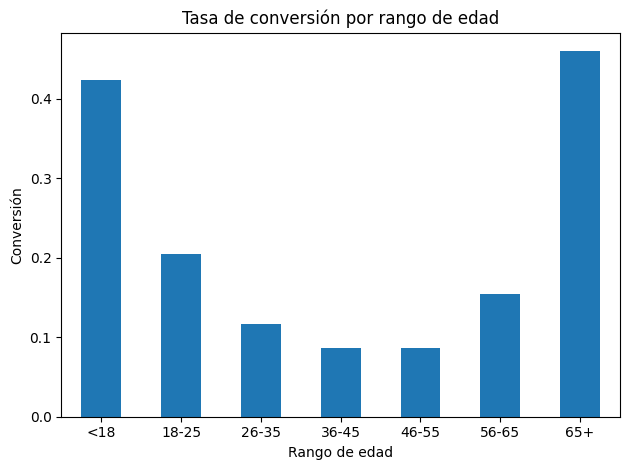

In [ ]:
# vamos ahora a ver gráficos
# importo matplotbit y veo la tasa de conversión por rango de edad tras crear columna de rangos

import matplotlib.pyplot as plt

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels)

conv_age = df.groupby('Age_range')['Service/product contracted'].mean()

conv_age.plot(kind='bar')

plt.title("Tasa de conversión por rango de edad")
plt.ylabel("Conversión")
plt.xlabel("Rango de edad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\athga\AppData\Local\Temp\ipykernel_23720\1745926677.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_duration = df.groupby(duration_bins)['Service/product contracted'].mean()


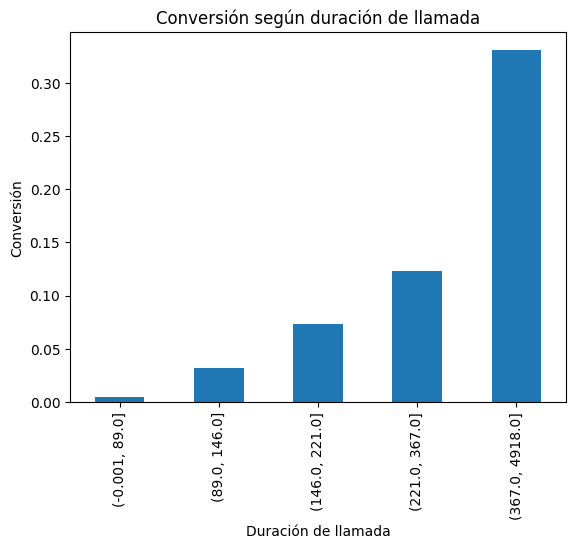

In [ ]:
# conversión según duración de llamada

duration_bins = pd.qcut(df['Duration'], 5)

conv_duration = df.groupby(duration_bins)['Service/product contracted'].mean()

conv_duration.plot(kind='bar')
plt.title("Conversión según duración de llamada")
plt.ylabel("Conversión")
plt.xlabel("Duración de llamada")
plt.show()

C:\Users\athga\AppData\Local\Temp\ipykernel_23720\1791765546.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_calls = df.groupby('Calls_range')['Service/product contracted'].mean()


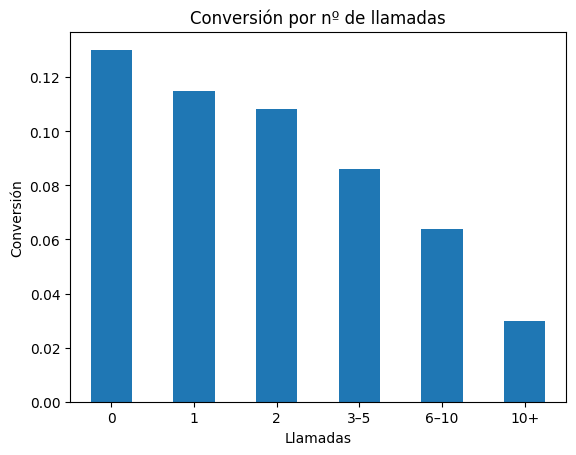

In [ ]:
# conversión según número de llamadas

bins = [0, 1, 2, 3, 5, 10, 100]
labels = ["0", "1", "2", "3–5", "6–10", "10+"]

df['Calls_range'] = pd.cut(df['Current campaign calls'], bins=bins, labels=labels)

conv_calls = df.groupby('Calls_range')['Service/product contracted'].mean()

conv_calls.plot(kind='bar')
plt.title("Conversión por nº de llamadas")
plt.ylabel("Conversión")
plt.xlabel("Llamadas")
plt.xticks(rotation=0)
plt.show()

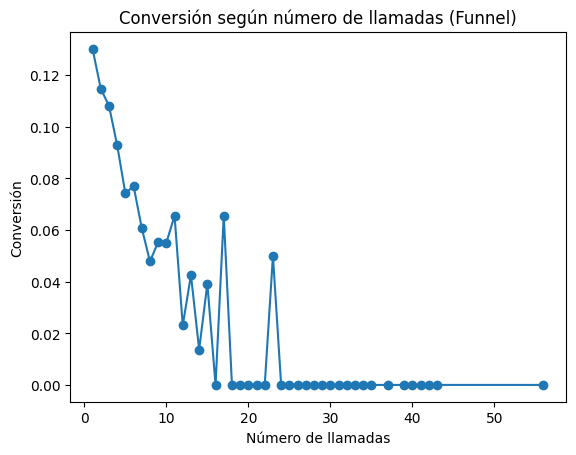

In [ ]:
# conversión según número de llamadas (funnel)

funnel = df.groupby('Current campaign calls')['Service/product contracted'].mean()

funnel.plot(marker='o')
plt.title("Conversión según número de llamadas (Funnel)")
plt.xlabel("Número de llamadas")
plt.ylabel("Conversión")
plt.show()